In [14]:
# Objective: Explore FPL data to identify key insights for fantasy league predictions.

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style='whitegrid')

In [16]:
# Load data from CSV files
elements_df = pd.read_csv('../data/raw/elements.csv')
element_types_df = pd.read_csv('../data/raw/element_types.csv')
teams_df = pd.read_csv('../data/raw/teams.csv')

# Display the first few rows of each DataFrame
print("Elements DataFrame:")
print(elements_df.head().to_string())

print("\nElement Types DataFrame:")
print(element_types_df.to_string())

print("\nTeams DataFrame:")
print(teams_df.head().to_string())

Elements DataFrame:
   chance_of_playing_next_round  chance_of_playing_this_round    code  cost_change_event  cost_change_event_fall  cost_change_start  cost_change_start_fall  dreamteam_count  element_type  ep_next  ep_this  event_points first_name  form  id  in_dreamteam                                                                news                   news_added  now_cost       photo  points_per_game           second_name  selected_by_percent  special  squad_number status  team  team_code  total_points  transfers_in  transfers_in_event  transfers_out  transfers_out_event  value_form  value_season      web_name  minutes  goals_scored  assists  clean_sheets  goals_conceded  own_goals  penalties_saved  penalties_missed  yellow_cards  red_cards  saves  bonus  bps  influence  creativity  threat  ict_index  starts  expected_goals  expected_assists  expected_goal_involvements  expected_goals_conceded  influence_rank  influence_rank_type  creativity_rank  creativity_rank_type  threat_ran

In [17]:
# Display basic info and data types
print("\nElements DataFrame Info:")
elements_df.info()

# Check for missing values
print("\nMissing values in Elements DataFrame:")
print(elements_df.isnull().sum())

# Display summary statistics
print("\nSummary statistics for Elements DataFrame:")
print(elements_df.describe())



Elements DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 88 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   chance_of_playing_next_round          212 non-null    float64
 1   chance_of_playing_this_round          192 non-null    float64
 2   code                                  655 non-null    int64  
 3   cost_change_event                     655 non-null    int64  
 4   cost_change_event_fall                655 non-null    int64  
 5   cost_change_start                     655 non-null    int64  
 6   cost_change_start_fall                655 non-null    int64  
 7   dreamteam_count                       655 non-null    int64  
 8   element_type                          655 non-null    int64  
 9   ep_next                               655 non-null    float64
 10  ep_this                               655 non-null    float6

In [18]:
# Convert data types if needed (e.g., converting 'now_cost' to float for accurate calculations)
elements_df['now_cost'] = elements_df['now_cost'] / 10  # Convert cost to a more readable format

# Optionally, display the first few rows to verify the changes
print("\nFirst few rows of the updated DataFrame:")
print(elements_df.head())


First few rows of the updated DataFrame:
   chance_of_playing_next_round  chance_of_playing_this_round    code  \
0                           0.0                           0.0  438098   
1                          50.0                           0.0  205651   
2                           NaN                           NaN  226597   
3                           NaN                           NaN  219847   
4                           0.0                           0.0  463748   

   cost_change_event  cost_change_event_fall  cost_change_start  \
0                  0                       0                 -1   
1                  0                       0                 -2   
2                  0                       0                  0   
3                  0                       0                  1   
4                  0                       0                  0   

   cost_change_start_fall  dreamteam_count  element_type  ep_next  ...  \
0                       1                0

/Users/robertoreis/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


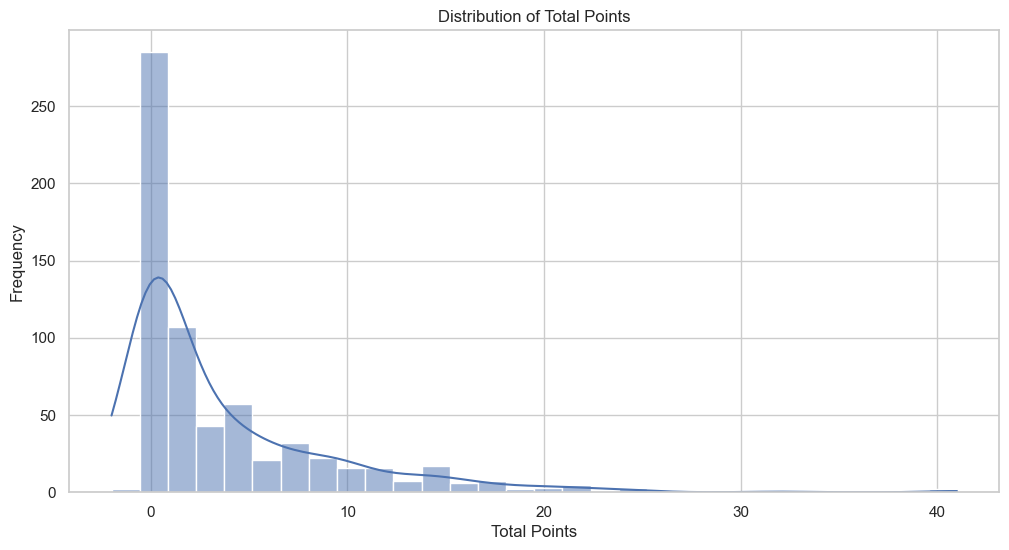

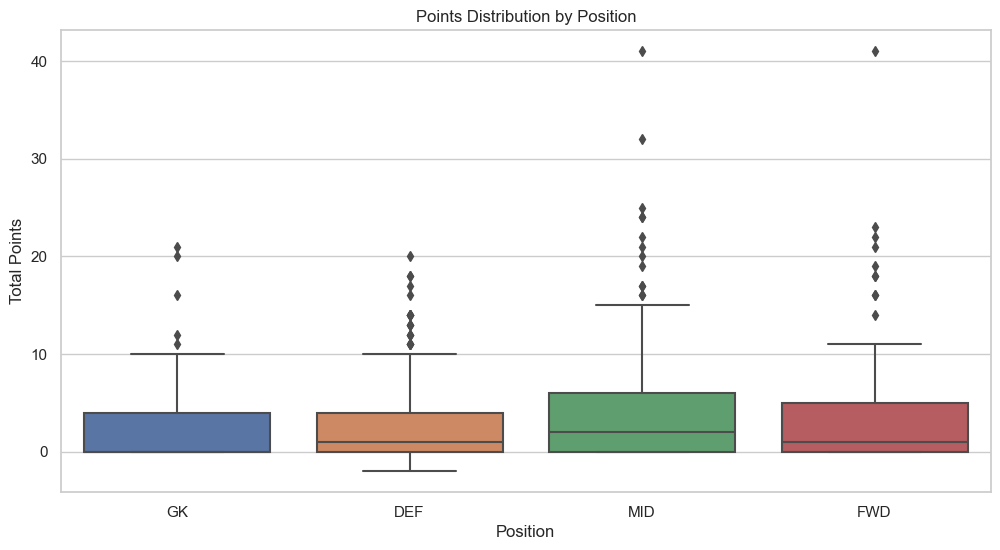

In [19]:
# Plot distribution of total points
plt.figure(figsize=(12, 6))
sns.histplot(elements_df['total_points'], kde=True, bins=30)
plt.title('Distribution of Total Points')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()

# Box plot of points by position
plt.figure(figsize=(12, 6))
sns.boxplot(x='element_type', y='total_points', data=elements_df)
plt.title('Points Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Total Points')
plt.xticks(ticks=[0, 1, 2, 3], labels=['GK', 'DEF', 'MID', 'FWD'])
plt.show()

In [20]:
# Merge elements with element types and teams to include readable positions and team names
elements_df = elements_df.merge(element_types_df[['id', 'singular_name']], 
                                left_on='element_type', right_on='id', how='left')
elements_df = elements_df.merge(teams_df[['id', 'name']], 
                                left_on='team', right_on='id', how='left')

# Rename columns for clarity
elements_df = elements_df.rename(columns={'singular_name': 'position', 'name': 'team_name'})

# Display updated DataFrame
print("Updated Elements DataFrame with Positions and Team Names:")
display(elements_df.head())

Updated Elements DataFrame with Positions and Team Names:


,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,id_y,position,id,team_name
0,0.0,0.0,438098,0,0,-1,1,0,3,0.0,...,627,286,591,259,0.0,0.00,3,Midfielder,1,Arsenal
1,50.0,0.0,205651,0,0,-2,2,0,4,0.5,...,648,69,200,33,0.0,0.00,4,Forward,1,Arsenal
2,NaN,NaN,226597,0,0,0,0,0,2,5.7,...,47,9,32,11,1.0,0.67,2,Defender,1,Arsenal
3,NaN,NaN,219847,0,0,1,-1,1,4,8.3,...,9,3,17,5,1.0,0.67,4,Forward,1,Arsenal
4,0.0,0.0,463748,0,0,0,0,0,1,0.0,...,411,50,521,64,0.0,0.00,1,Goalkeeper,1,Arsenal


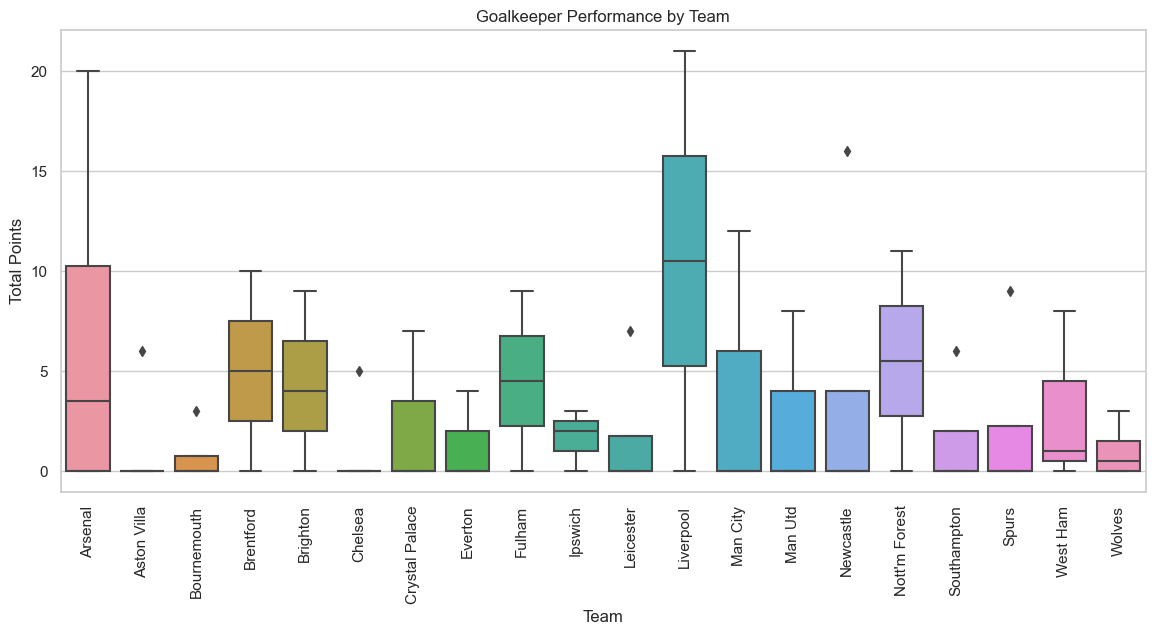

Top 10 Goalkeepers by Total Points:


,web_name,team_name,total_points,minutes,goals_scored,assists
365,A.Becker,Liverpool,21,270,0,0
11,Raya,Arsenal,20,270,0,0
473,Pope,Newcastle,16,270,0,0
401,Ederson M.,Man City,12,270,0,0
506,Sels,Nott'm Forest,11,270,0,0
99,Flekken,Brentford,10,270,0,0
282,Leno,Fulham,9,270,0,0
154,Steele,Brighton,9,180,0,0
584,Vicario,Spurs,9,270,0,0
440,Onana,Man Utd,8,270,0,0


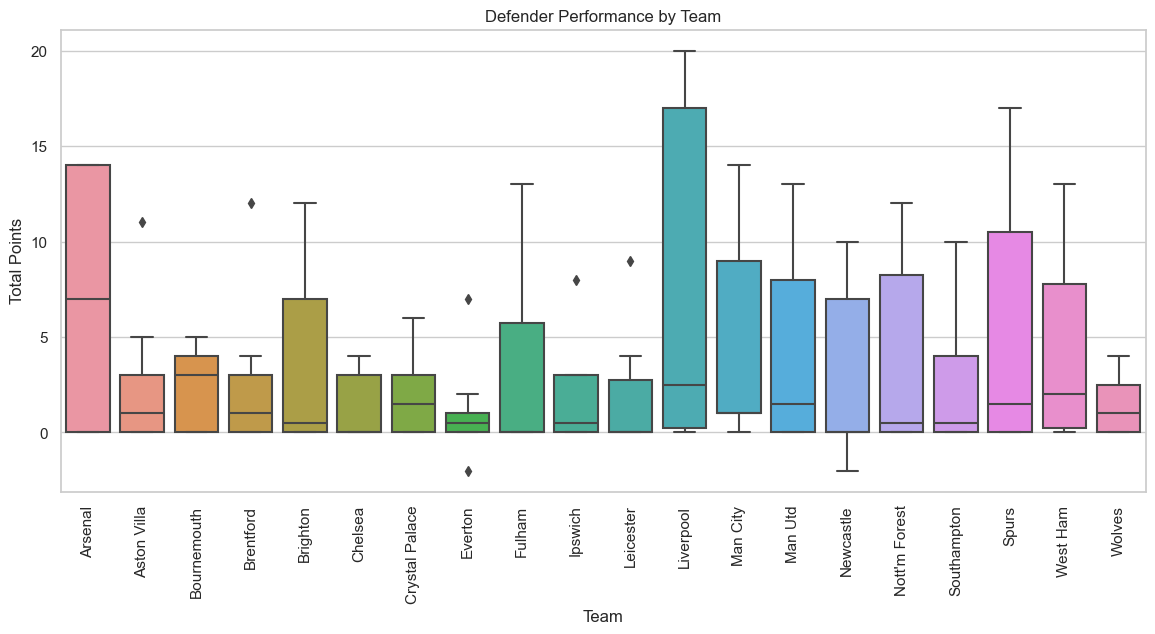

Top 10 Defenders by Total Points:


,web_name,team_name,total_points,minutes,goals_scored,assists
366,Alexander-Arnold,Liverpool,20,222,0,0
392,Virgil,Liverpool,18,270,0,0
389,Robertson,Liverpool,18,250,0,0
575,Romero,Spurs,17,270,1,0
572,Pedro Porro,Spurs,16,270,1,0
2,Gabriel,Arsenal,14,270,0,0
409,Lewis,Man City,14,270,0,1
14,Saliba,Arsenal,14,270,0,0
19,White,Arsenal,14,270,0,0
380,Konaté,Liverpool,14,225,0,0


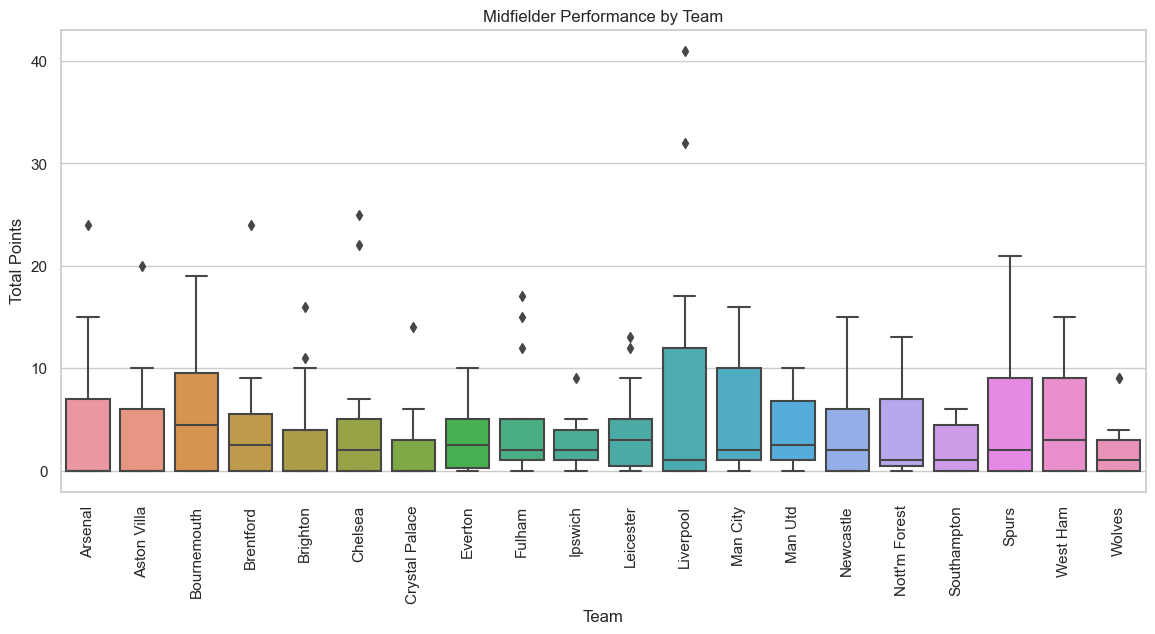

Top 10 Midfielders by Total Points:


,web_name,team_name,total_points,minutes,goals_scored,assists
382,M.Salah,Liverpool,41,262,3,3
381,Luis Díaz,Liverpool,32,226,3,1
198,Palmer,Chelsea,25,262,1,4
13,Saka,Arsenal,24,256,1,3
107,Mbeumo,Brentford,24,269,3,0
193,Madueke,Chelsea,22,175,3,0
579,Son,Spurs,21,270,2,0
59,Onana,Aston Villa,20,226,2,0
82,Semenyo,Bournemouth,19,270,2,1
273,Adama,Fulham,17,235,1,1


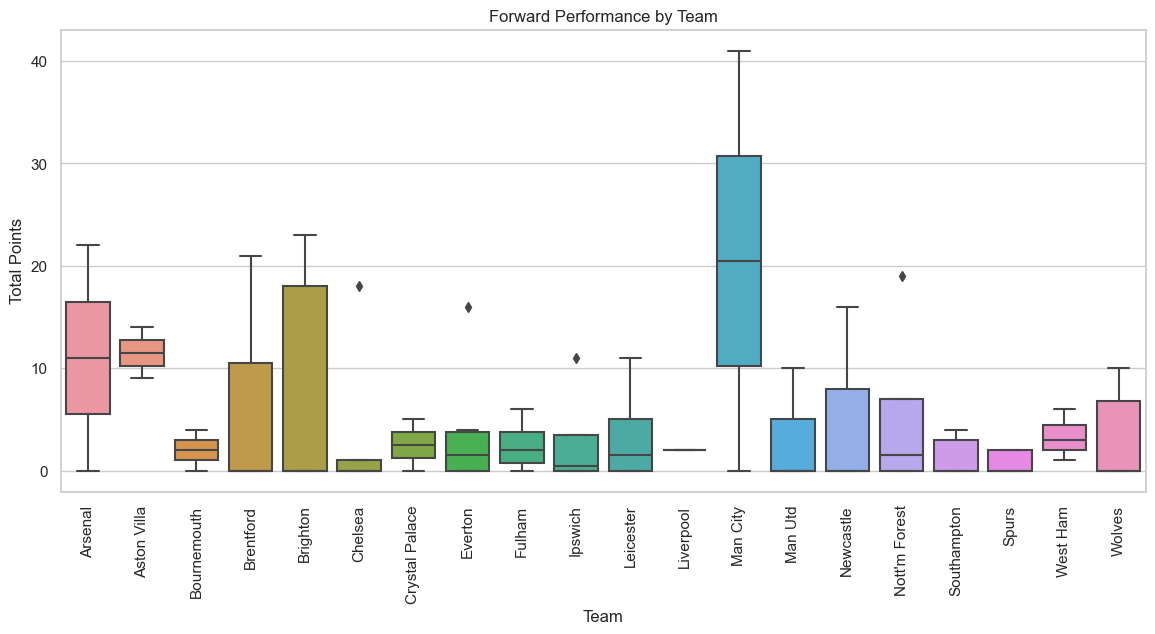

Top 10 Forwards by Total Points:


,web_name,team_name,total_points,minutes,goals_scored,assists
405,Haaland,Man City,41,269,7,0
160,Welbeck,Brighton,23,252,2,1
3,Havertz,Arsenal,22,270,2,1
118,Wissa,Brentford,21,245,2,1
509,Wood,Nott'm Forest,19,235,2,0
196,N.Jackson,Chelsea,18,222,2,1
141,João Pedro,Brighton,18,261,2,0
245,Calvert-Lewin,Everton,16,233,1,1
461,Isak,Newcastle,16,270,1,1
38,Duran,Aston Villa,14,82,2,0


In [21]:
# Analyze performance metrics by position
positions = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

for position in positions:
    position_df = elements_df[elements_df['position'] == position]
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='team_name', y='total_points', data=position_df)
    plt.title(f'{position} Performance by Team')
    plt.xticks(rotation=90)
    plt.ylabel('Total Points')
    plt.xlabel('Team')
    plt.show()

    # Top performers in the position
    top_players = position_df.sort_values(by='total_points', ascending=False).head(10)
    print(f"Top 10 {position}s by Total Points:")
    display(top_players[['web_name', 'team_name', 'total_points', 'minutes', 'goals_scored', 'assists']])


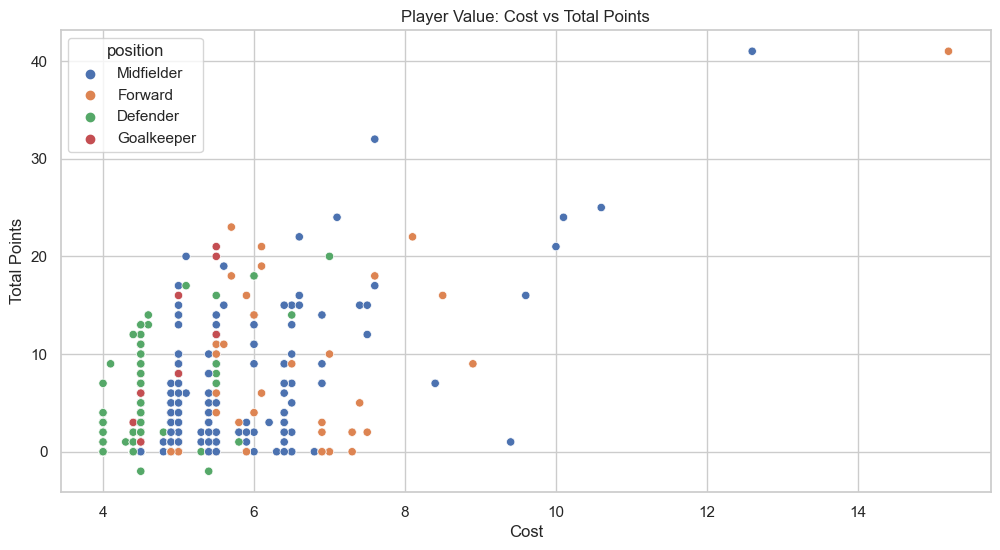

Undervalued Players (High Points, Low Cost):


,web_name,team_name,position,total_points,now_cost
15,Thomas,Arsenal,Midfielder,15,5.0
20,Zinchenko,Arsenal,Defender,7,5.0
21,Neto,Arsenal,Goalkeeper,7,4.5
36,Digne,Aston Villa,Defender,11,4.5
44,Konsa,Aston Villa,Defender,5,4.5
...,...,...,...,...,...
612,G.Rodríguez,West Ham,Midfielder,6,5.0
618,Aït-Nouri,Wolves,Defender,4,4.5
620,Bellegarde,Wolves,Midfielder,9,5.0
627,Dawson,Wolves,Defender,4,4.5


In [22]:
# Value for money: Compare cost vs points
plt.figure(figsize=(12, 6))
sns.scatterplot(x='now_cost', y='total_points', hue='position', data=elements_df)
plt.title('Player Value: Cost vs Total Points')
plt.xlabel('Cost')
plt.ylabel('Total Points')
plt.show()

# Identify undervalued players
undervalued_players = elements_df[(elements_df['total_points'] > elements_df['total_points'].mean()) & 
                                  (elements_df['now_cost'] < elements_df['now_cost'].mean())]
print("Undervalued Players (High Points, Low Cost):")
display(undervalued_players[['web_name', 'team_name', 'position', 'total_points', 'now_cost']])


In [23]:
# Define budget and position constraints
budget = 80.0  # Fantasy league budget
max_per_team = 2  # Max players allowed from a single team
position_requirements = {'Goalkeeper': 1, 'Defender': 4, 'Midfielder': 4, 'Forward': 2}

# Select the best players by position within constraints
optimal_lineup = pd.DataFrame()
for position, count in position_requirements.items():
    best_players = elements_df[elements_df['position'] == position].sort_values(by='total_points', ascending=False)
    selected_players = best_players.head(count)
    optimal_lineup = pd.concat([optimal_lineup, selected_players])

# Check if lineup is within budget
total_cost = optimal_lineup['now_cost'].sum()
if total_cost <= budget:
    print(f"Optimal lineup selected within budget of {budget}M:")
else:
    print(f"Selected lineup exceeds budget by {total_cost - budget:.1f}M. Consider adjustments.")

# Display selected lineup
display(optimal_lineup[['web_name', 'team_name', 'position', 'total_points', 'now_cost']])


Selected lineup exceeds budget by 11.4M. Consider adjustments.


,web_name,team_name,position,total_points,now_cost
365,A.Becker,Liverpool,Goalkeeper,21,5.5
366,Alexander-Arnold,Liverpool,Defender,20,7.0
392,Virgil,Liverpool,Defender,18,6.0
389,Robertson,Liverpool,Defender,18,6.0
575,Romero,Spurs,Defender,17,5.1
382,M.Salah,Liverpool,Midfielder,41,12.6
381,Luis Díaz,Liverpool,Midfielder,32,7.6
198,Palmer,Chelsea,Midfielder,25,10.6
13,Saka,Arsenal,Midfielder,24,10.1
405,Haaland,Man City,Forward,41,15.2


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

Photo URL for Ederson M.: https://resources.premierleague.com/premierleague/photos/players/110x140/p121160.png


/var/folders/m3/fdsx0z8944b6_th83kt65w_r0000gn/T/ipykernel_92630/3619915025.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_players = elements_df.groupby('position').apply(lambda x: x.sort_values(by='total_points', ascending=False).head(1))


Photo URL for Aina: https://resources.premierleague.com/premierleague/photos/players/110x140/p159506.png
Photo URL for A.Fatawu: https://resources.premierleague.com/premierleague/photos/players/110x140/p531442.png
Photo URL for Vardy: https://resources.premierleague.com/premierleague/photos/players/110x140/p101668.png


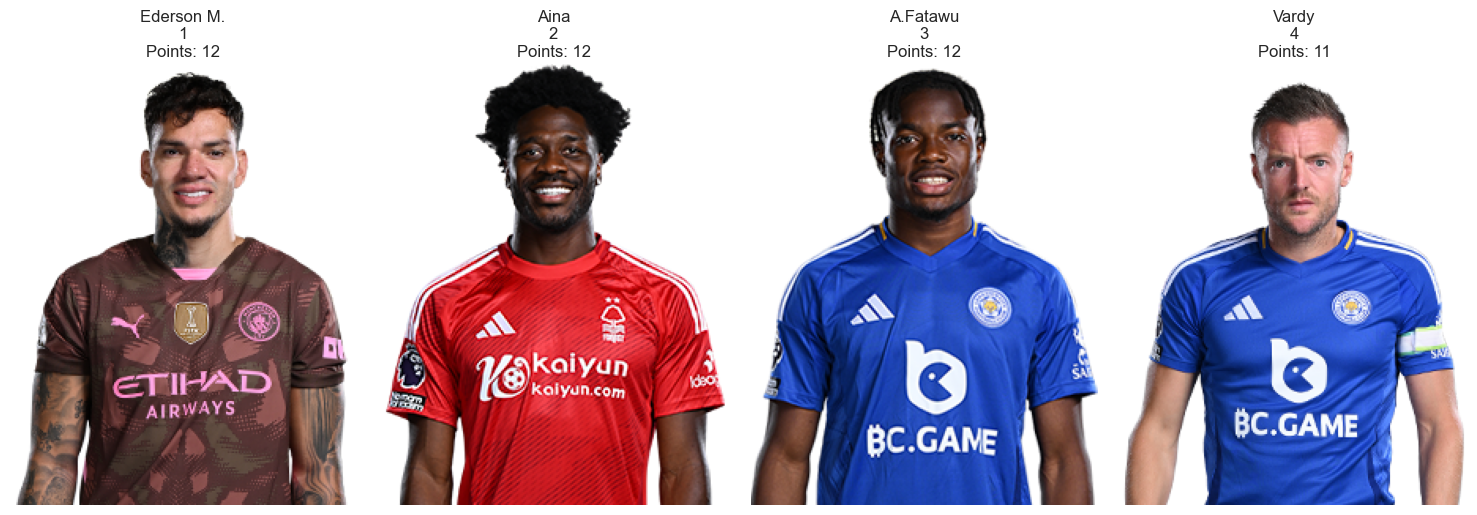

In [25]:
# Load the processed data
elements_df = pd.read_csv('../data/processed/elements_processed.csv')

# Define the base URL for player photos
photo_base_url = "https://resources.premierleague.com/premierleague/photos/players/110x140/p"

# Function to get the full photo URL for a player
def get_photo_url(photo_filename):
    # Ensure the photo filename is correctly formatted without extra extensions
    photo_id = photo_filename.split('.')[0]  # Remove any .jpg extension if present
    return f"{photo_base_url}{photo_id}.png"

# Find the top player for each position
top_players = elements_df.groupby('position').apply(lambda x: x.sort_values(by='total_points', ascending=False).head(1))

# Plot the picture of the top player for each position
fig, axes = plt.subplots(1, len(top_players), figsize=(15, 5))

for ax, (_, player) in zip(axes, top_players.iterrows()):
    player_name = player['web_name']
    position = player['position']
    total_points = player['total_points']
    
    # Get the photo URL
    photo_url = get_photo_url(player['photo'])
    print(f"Photo URL for {player_name}: {photo_url}")  # Debug print statement
    
    try:
        # Fetch and display the image
        response = requests.get(photo_url)
        response.raise_for_status()  # Raises an error for bad responses (e.g., 404)
        img = Image.open(BytesIO(response.content))
        
        # Display the image with the player's name and position
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"{player_name}\n{position}\nPoints: {total_points}")
        
    except Exception as e:
        print(f"Error loading image for {player_name}: {e}")
        ax.axis('off')
        ax.set_title(f"{player_name}\n{position}\nPoints: {total_points} (Image not available)")

plt.tight_layout()
plt.show()


In [26]:
#Save top players by position to a CSV or JSON
top_players = elements_df.groupby('position').apply(lambda x: x.sort_values(by='total_points', ascending=False).head(1))

# Save to a CSV file for use in visualization
top_players.to_csv('../data/processed/top_players_lineup.csv', index=False)


/var/folders/m3/fdsx0z8944b6_th83kt65w_r0000gn/T/ipykernel_92630/1052809467.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_players = elements_df.groupby('position').apply(lambda x: x.sort_values(by='total_points', ascending=False).head(1))
